In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### train.csv is the data that is to be splitted in train and validation set for model training and evaluation. test.csv is for final prediction.

---
---

### reading train.csv and test.csv and storing in pandas dataframe

In [ ]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")


"""
train=pd.read_csv("/kaggle/input/playground-series-s5e12/train.csv")
test=pd.read_csv("/kaggle/input/playground-series-s5e12/test.csv")
"""

In [3]:
### checking if all the features in train.csv are also present in test.csv

features=train.drop(columns='diagnosed_diabetes').columns

In [4]:
test.columns==features

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [5]:
### yes! all the features are common in both the datasets.

### --------------- EDA on the dataset -------------------

In [6]:
### information of the dataset

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

In [7]:
### no of missing values in the train and test dataset

print(train.isna().sum().sum())
print(test.isna().sum().sum())

0
0


In [8]:
### train and test both the datasets are completely clean with no missing values.

In [9]:
### train dataset has some columns with object data type

for col in train.columns:
    if train[col].dtype=='object':
        print(col)

gender
ethnicity
education_level
income_level
smoking_status
employment_status


In [10]:
### let's check which columns in test data are also of object data type.

for col in test.columns:
    if test[col].dtype=='object':
        print(col)

gender
ethnicity
education_level
income_level
smoking_status
employment_status


In [11]:
### train and test data both have same colmumns with object data type. No further transformation needed.

In [12]:
numerical_data=train.select_dtypes(include=['number'])

In [13]:
numerical_data.drop(columns=['id'],inplace=True)

In [14]:
categorical_data=train.select_dtypes(include=['object'])

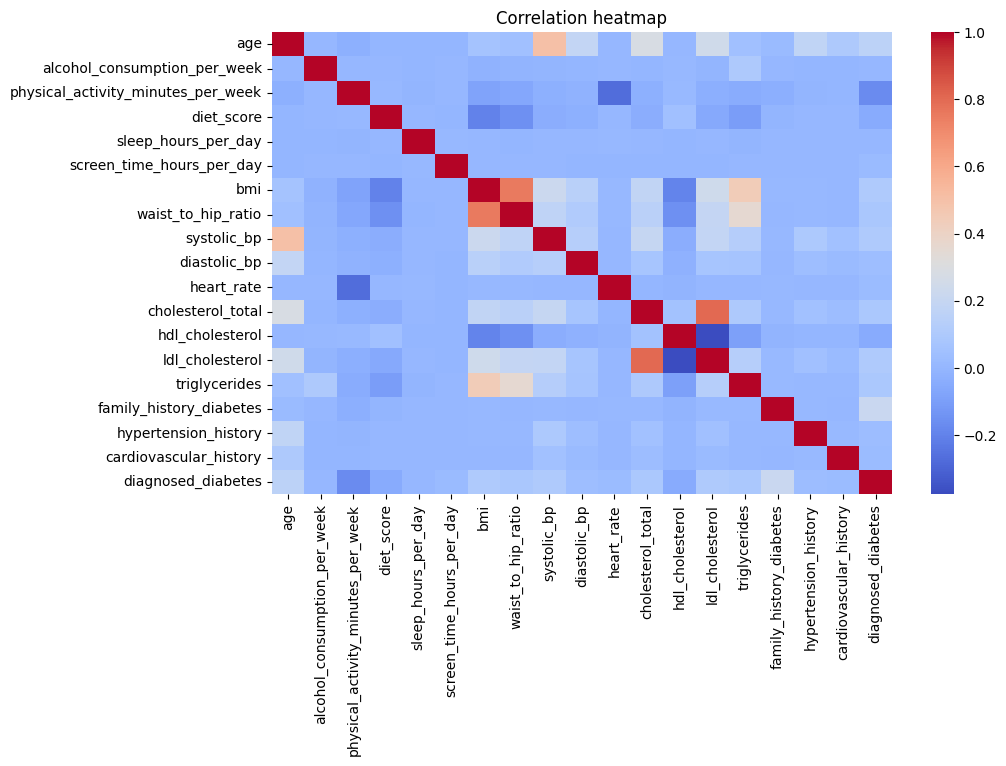

In [15]:
### correlation heatmap between the numerical features

cor_mat=numerical_data.corr()

plt.figure(figsize=(10,6))
sns.heatmap(cor_mat,cmap='coolwarm',fmt='.2f')
plt.title('Correlation heatmap')
plt.show()

In [16]:
### correlation coefficient between the target and other numerical features

f,c=[],[]
for col in numerical_data.columns:
    f.append(col)
    c.append(numerical_data[col].corr(numerical_data['diagnosed_diabetes']))
frame=pd.DataFrame({'features':f,'correlation coefficient':c})
frame.sort_values('correlation coefficient',ascending=False).reset_index(drop=True)

,features,correlation coefficient
0,diagnosed_diabetes,1.000000
1,family_history_diabetes,0.211064
2,age,0.161162
3,systolic_bp,0.107132
4,bmi,0.105580
5,ldl_cholesterol,0.102771
6,triglycerides,0.090635
7,cholesterol_total,0.088112
8,waist_to_hip_ratio,0.081050
9,diastolic_bp,0.036271


Bar plot of different features vs total diabetes case. This is not histogram of different features.


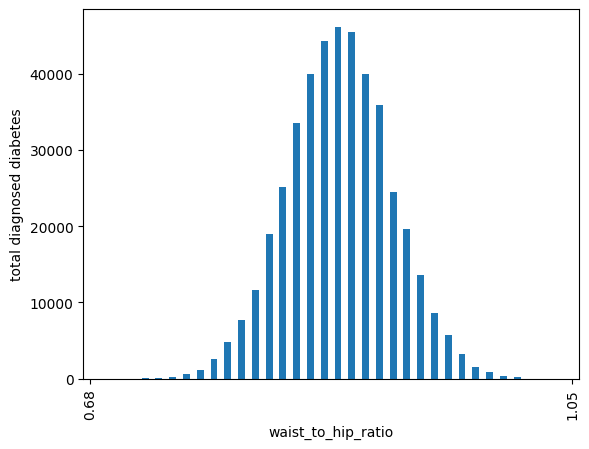

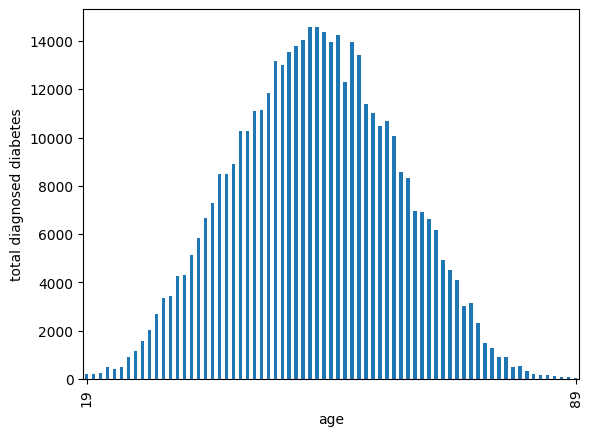

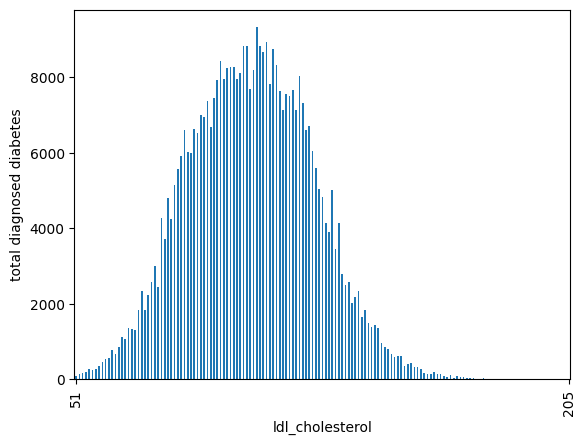

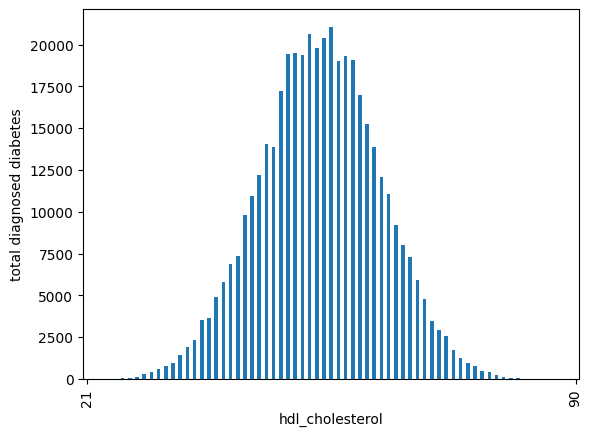

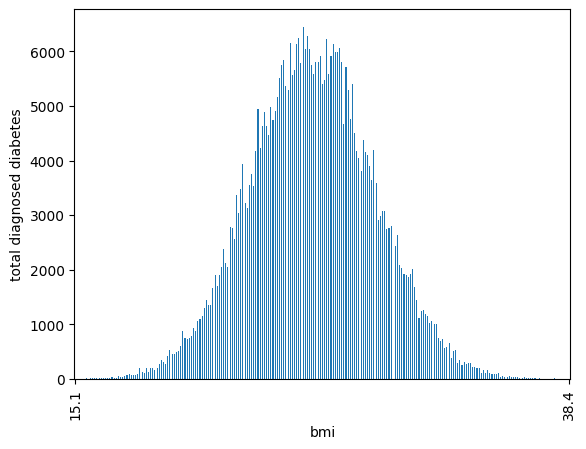

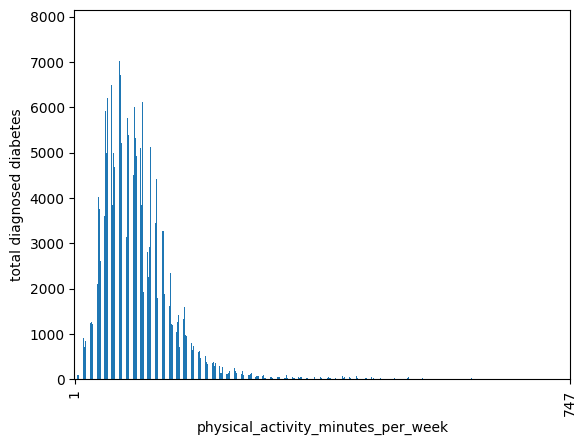

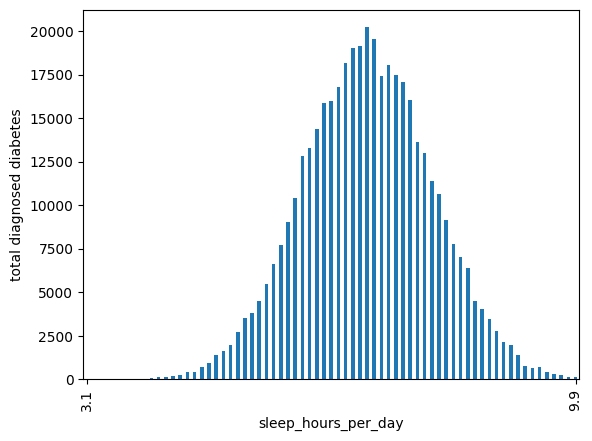

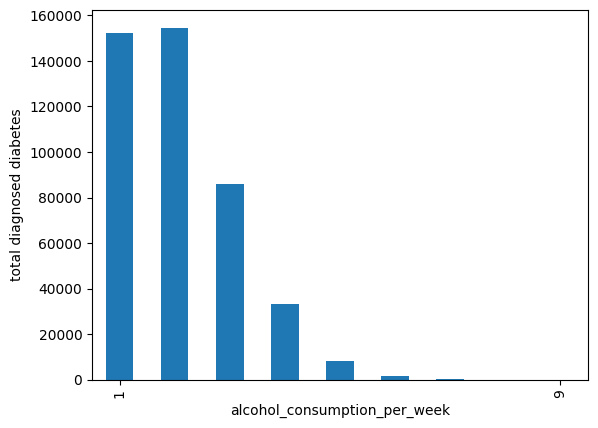

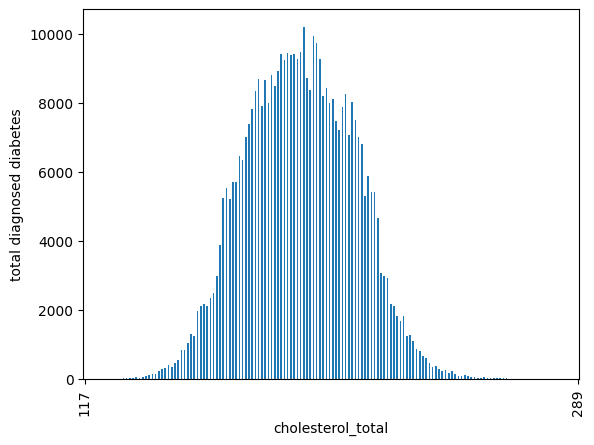

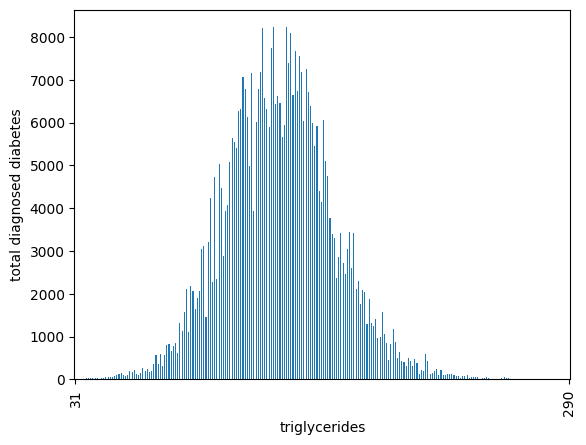

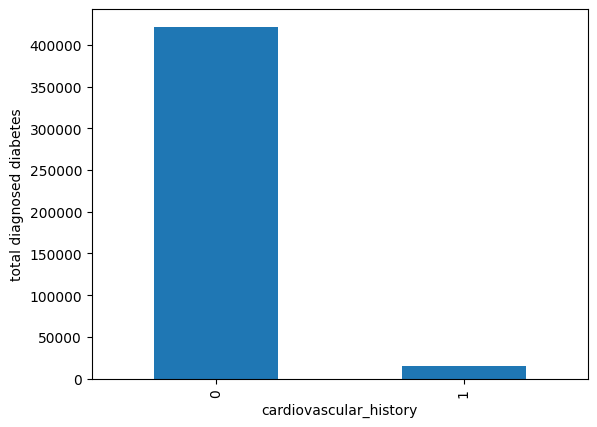

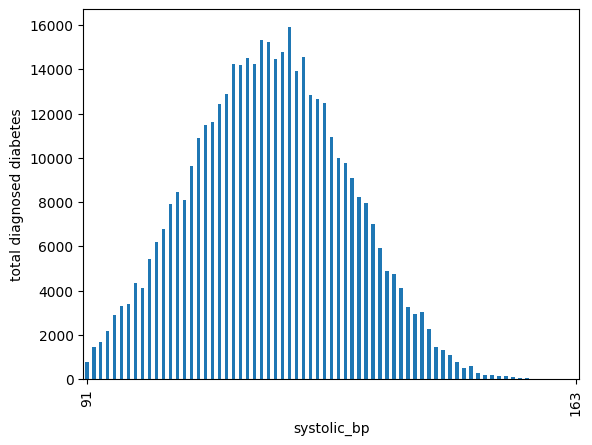

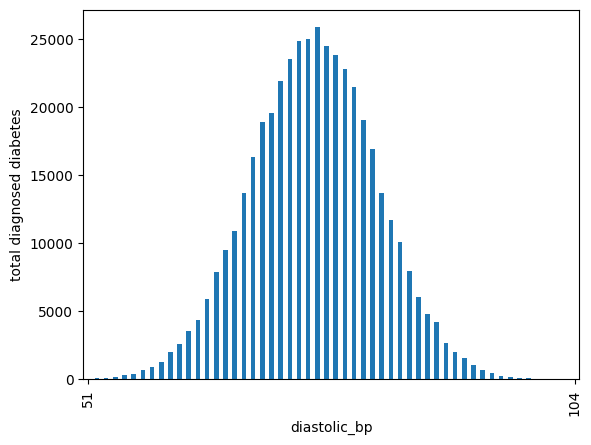

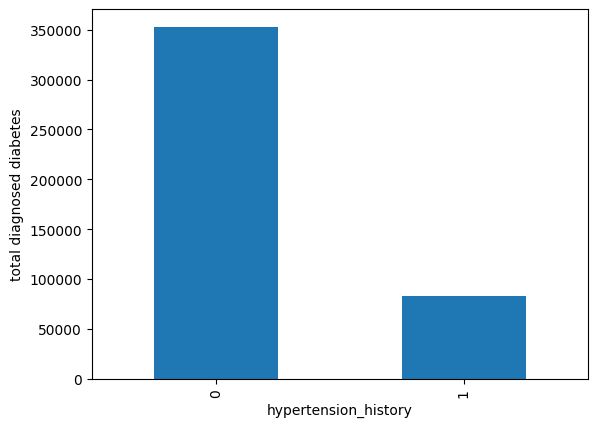

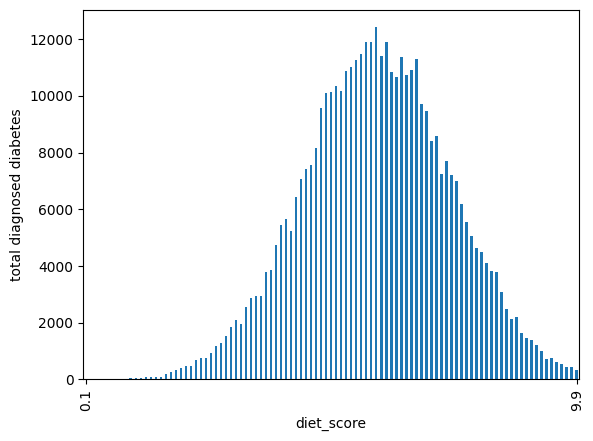

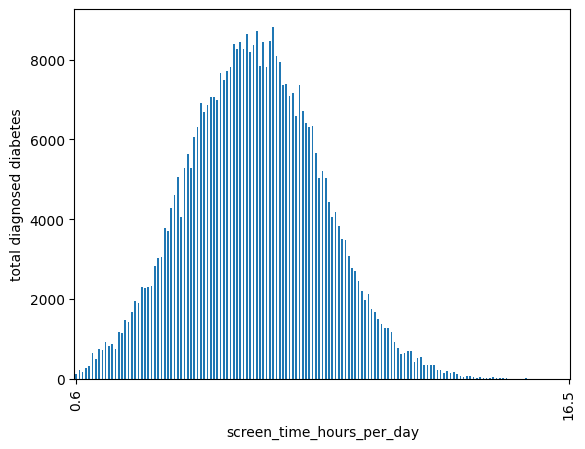

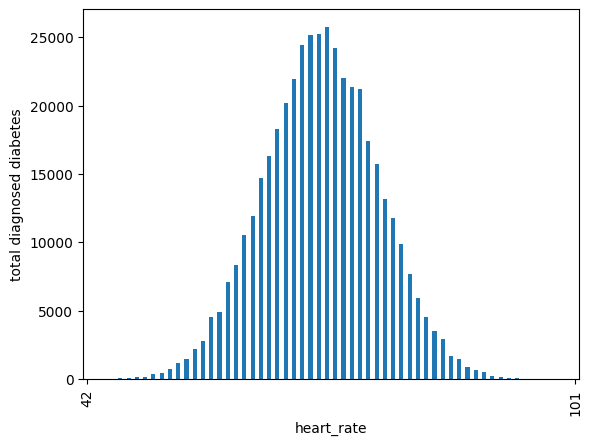

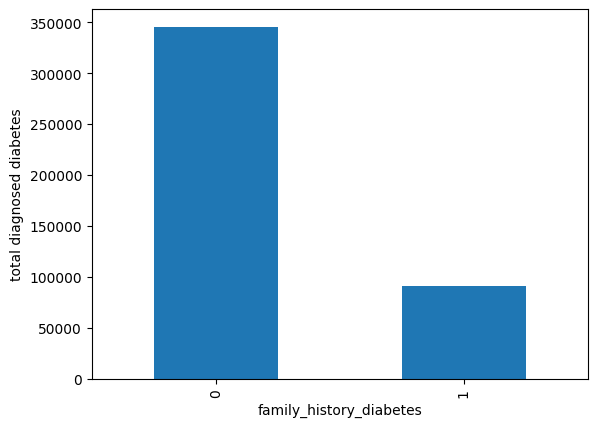

In [17]:
### impact of different numerical features on diabetes. How to implement this?

import seaborn as sns

print("Bar plot of different features vs total diabetes case. This is not histogram of different features.")
for feature in set(numerical_data.columns)-{'diagnosed_diabetes'}:
    f=pd.DataFrame(numerical_data.groupby(feature)['diagnosed_diabetes'].sum()).reset_index().sort_values(feature)
    ax=f.plot.bar(y='diagnosed_diabetes', legend=False)
    
    # index positions of min and max
    min_idx = f[feature].idxmin()
    max_idx = f[feature].idxmax()

    ax.set_xticks([min_idx, max_idx])
    ax.set_xticklabels([f[feature].min(), f[feature].max()])
    
    #plt.title(f"Bar Plot of {feature} vs Total diabetes case")
    plt.xlabel(feature)
    plt.ylabel('total diagnosed diabetes')
    plt.show()

In [18]:
### How many unique values are there in each categorical column?

for col in categorical_data.columns:
    print(f"unique elements in {col} is ---> {categorical_data[col].unique()}")

unique elements in gender is ---> ['Female' 'Male' 'Other']
unique elements in ethnicity is ---> ['Hispanic' 'White' 'Asian' 'Black' 'Other']
unique elements in education_level is ---> ['Highschool' 'Graduate' 'Postgraduate' 'No formal']
unique elements in income_level is ---> ['Lower-Middle' 'Upper-Middle' 'Low' 'Middle' 'High']
unique elements in smoking_status is ---> ['Current' 'Never' 'Former']
unique elements in employment_status is ---> ['Employed' 'Retired' 'Student' 'Unemployed']


Bar plot of different categorical features vs total diabetes case. This is not histogram of different features.


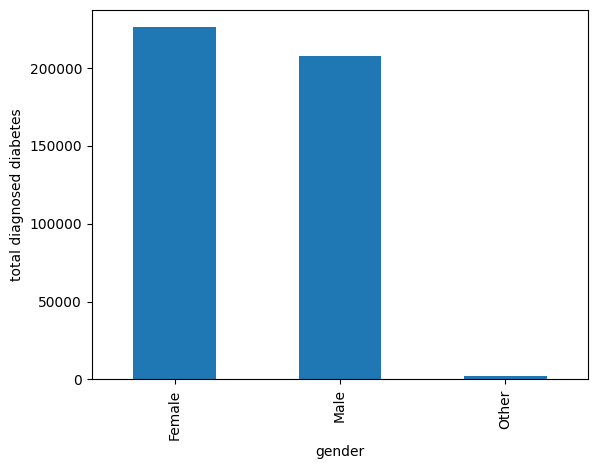

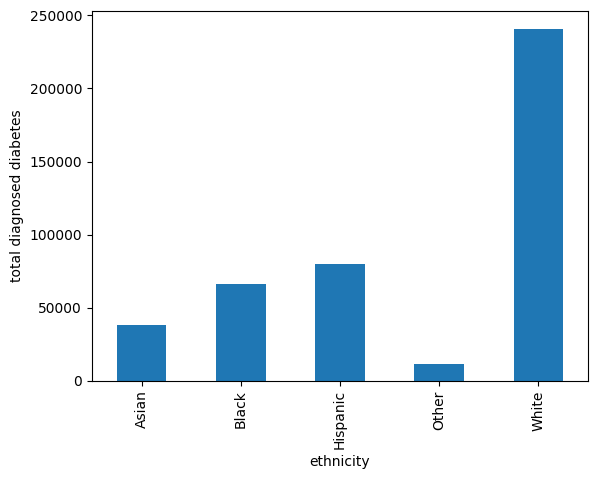

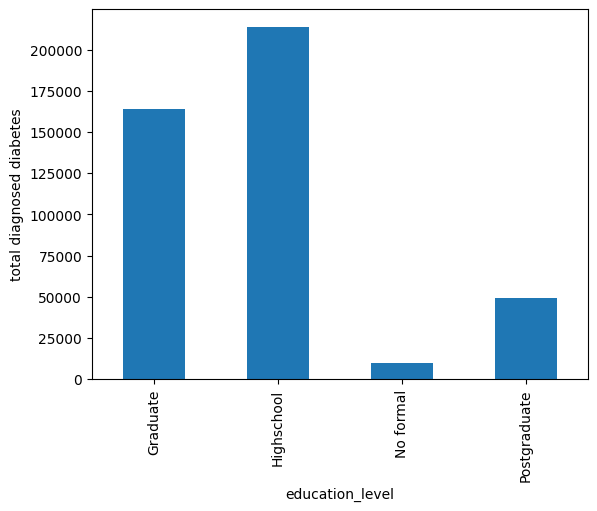

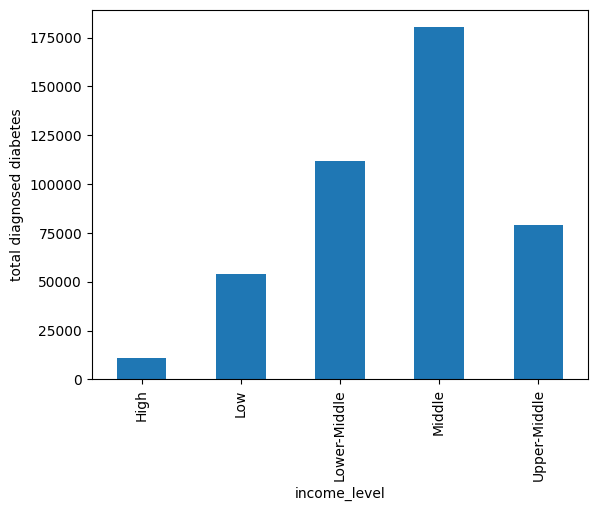

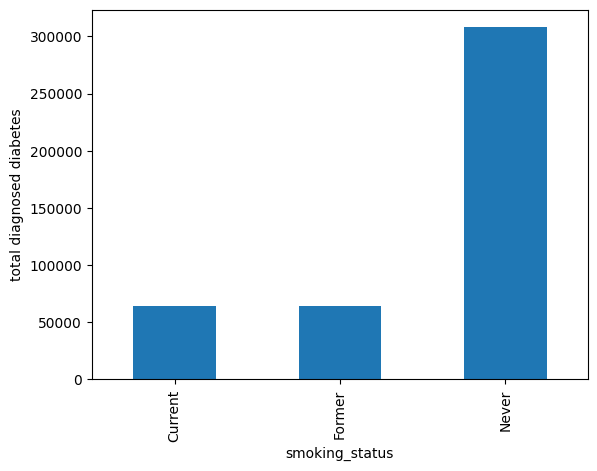

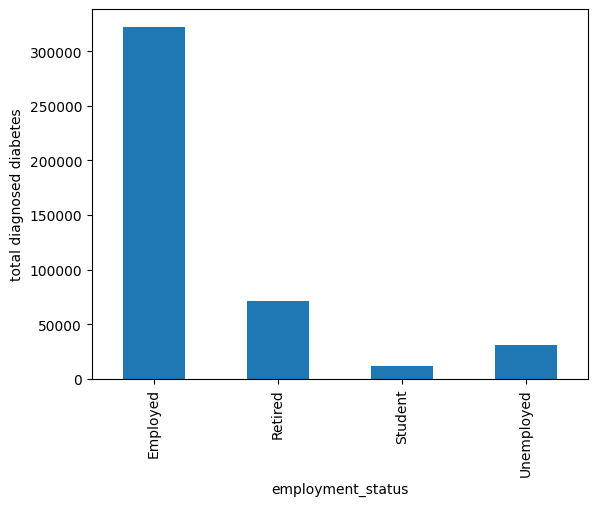

In [19]:
### impact of different categorical features on diabetes.

import seaborn as sns

print("Bar plot of different categorical features vs total diabetes case. This is not histogram of different features.")
for feature in categorical_data.columns:
    f=pd.DataFrame(train.groupby(feature)['diagnosed_diabetes'].sum())
    ax=f.plot.bar(y='diagnosed_diabetes', legend=False)
    
    plt.xlabel(feature)
    plt.ylabel('total diagnosed diabetes')
    plt.show()

### Distribuition of Numerical features

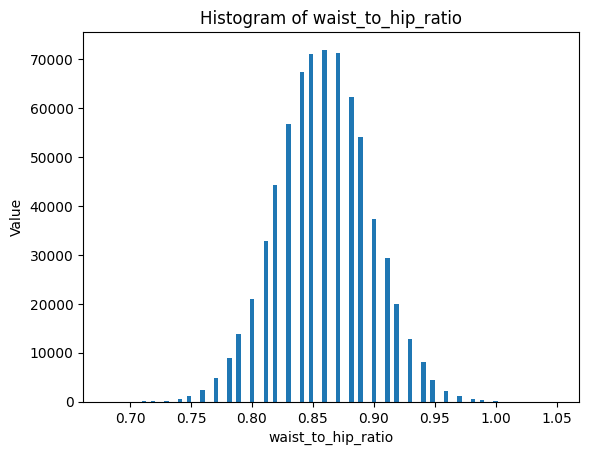

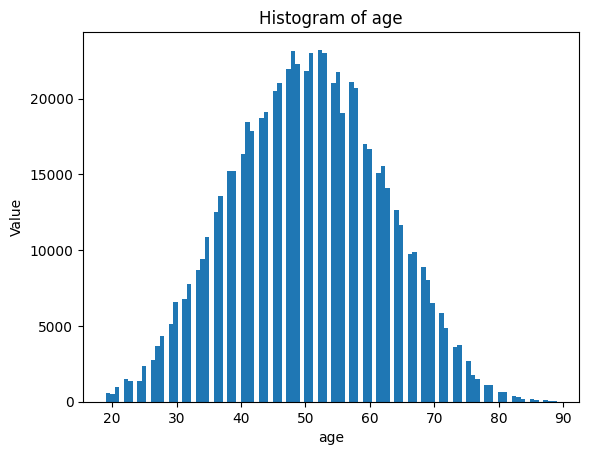

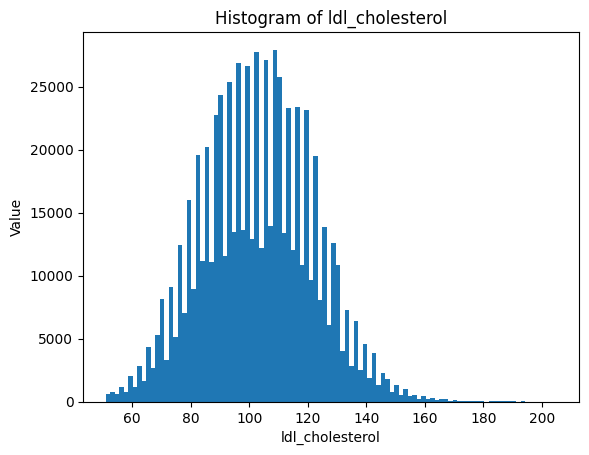

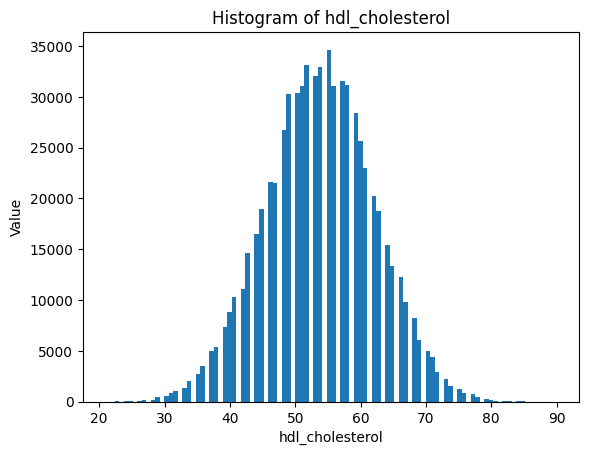

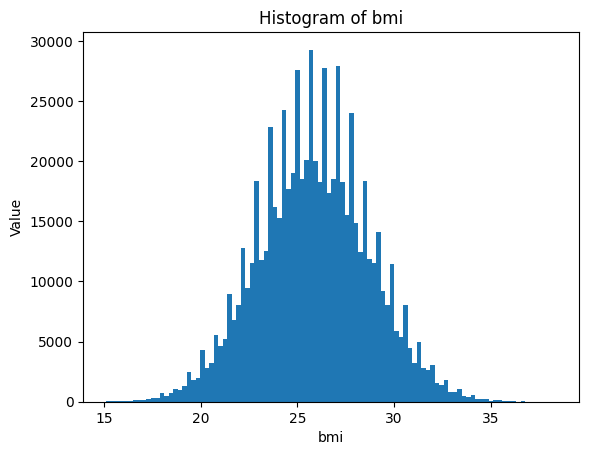

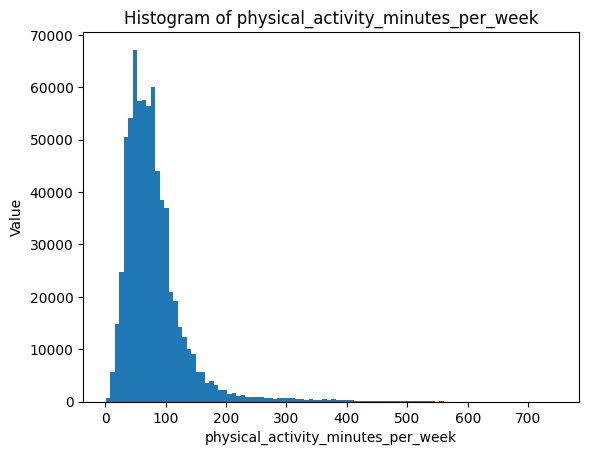

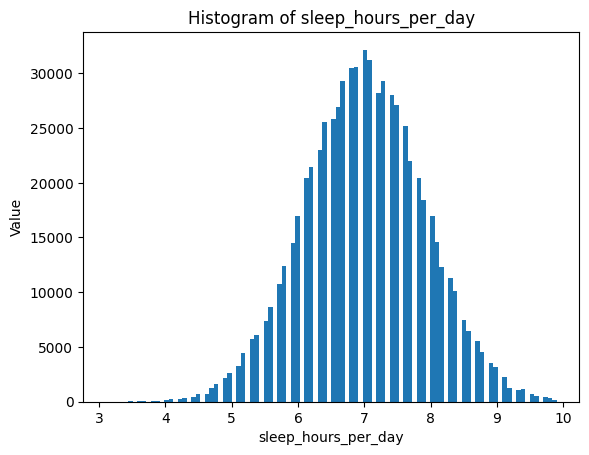

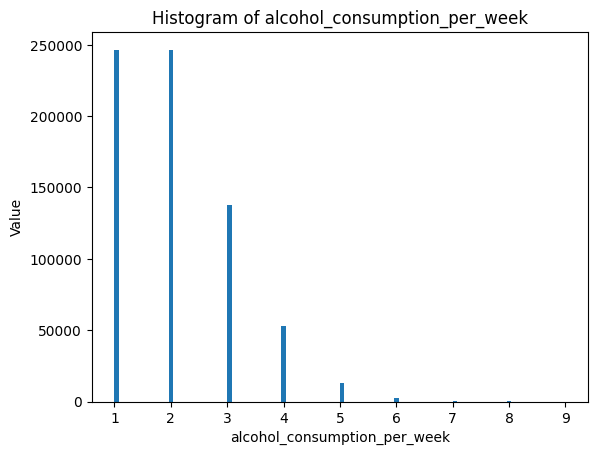

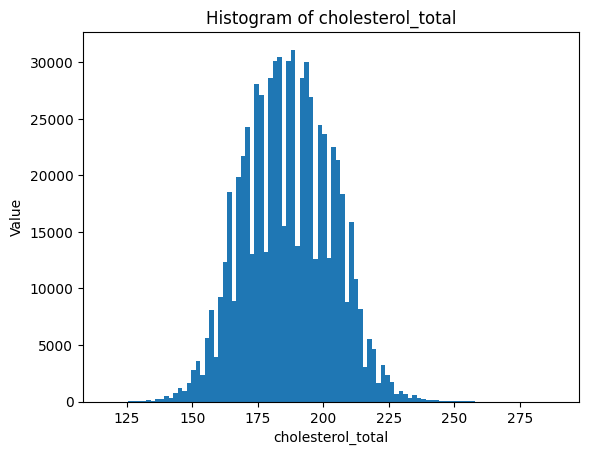

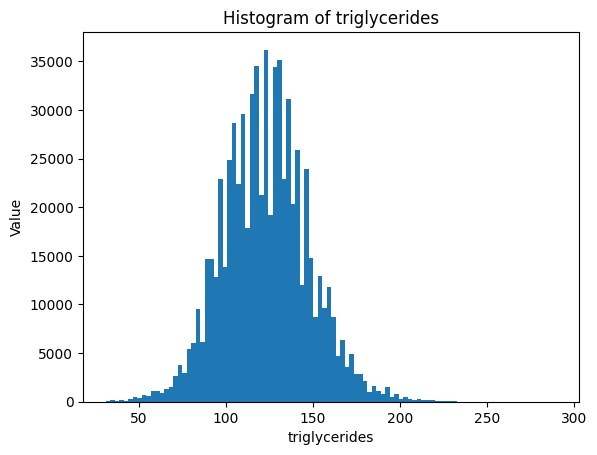

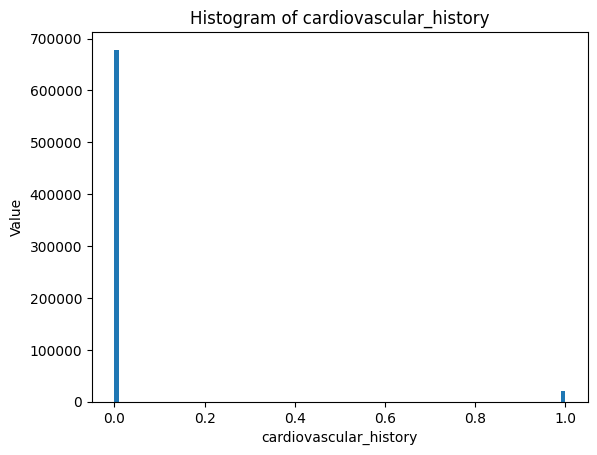

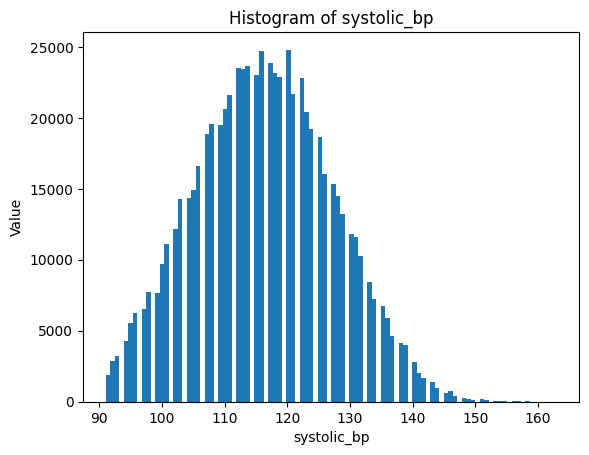

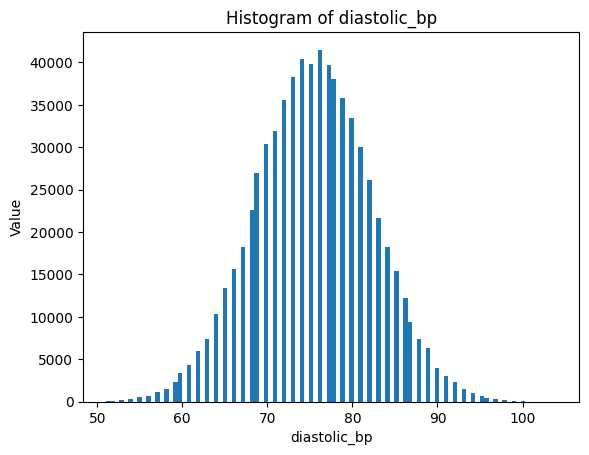

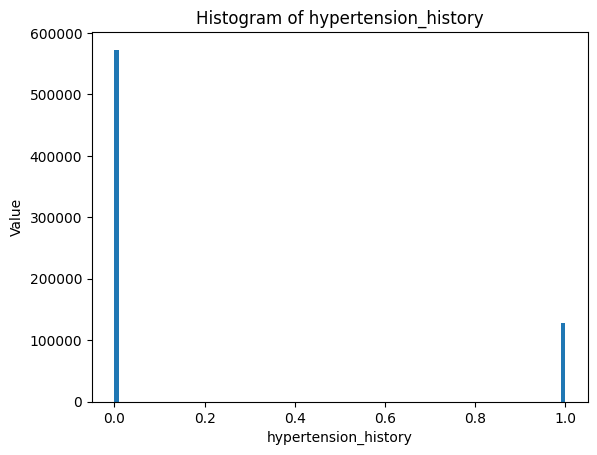

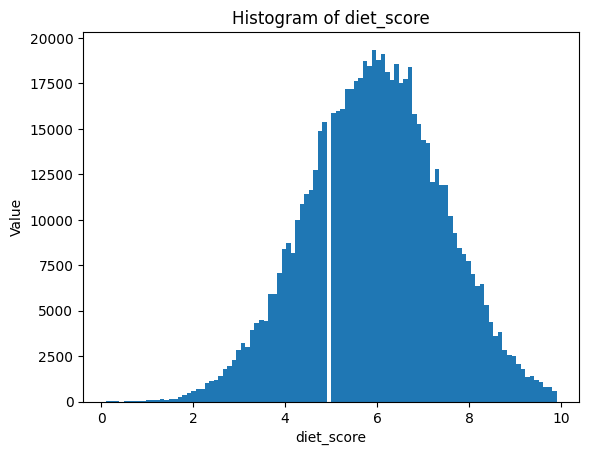

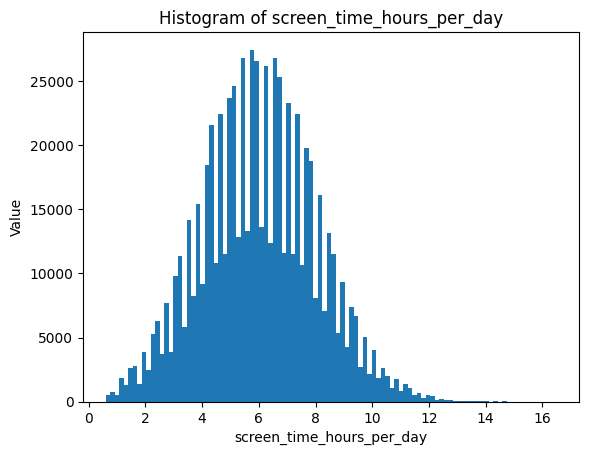

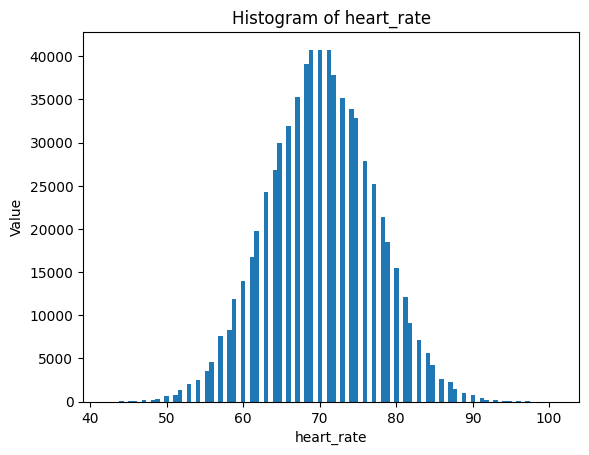

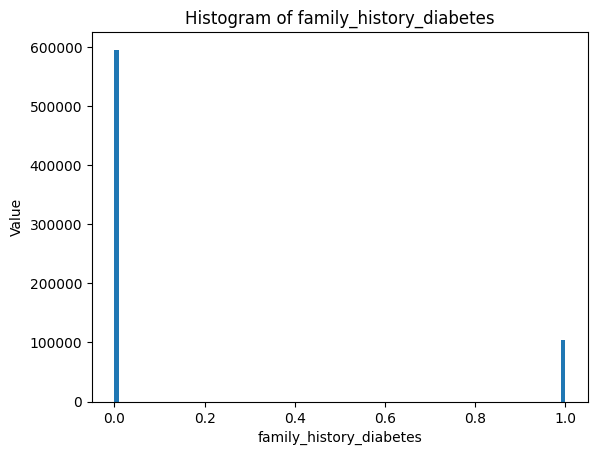

In [20]:
for col in set(numerical_data.columns)-{'diagnosed_diabetes'}:
    plt.hist(numerical_data[col],bins=100)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Value")
    plt.show()

### Skewness of each numercial features

In [21]:
for col in set(numerical_data.columns)-{'diagnosed_diabetes'}:
    print(f"skewness of {col} is {numerical_data[col].skew()}")
    print("\n")
    print("*"*50)
    print("\n")

skewness of waist_to_hip_ratio is 0.03771551013686784


**************************************************


skewness of age is 0.0209047954127797


**************************************************


skewness of ldl_cholesterol is 0.13230062544051005


**************************************************


skewness of hdl_cholesterol is -0.02125836956958857


**************************************************


skewness of bmi is 0.03210674326198535


**************************************************


skewness of physical_activity_minutes_per_week is 2.814196971753902


**************************************************


skewness of sleep_hours_per_day is 0.0014862672278747294


**************************************************


skewness of alcohol_consumption_per_week is 0.9323752029286132


**************************************************


skewness of cholesterol_total is 0.06105656434508177


**************************************************


skewness of triglycerides is 0

### Distribution of categorical features

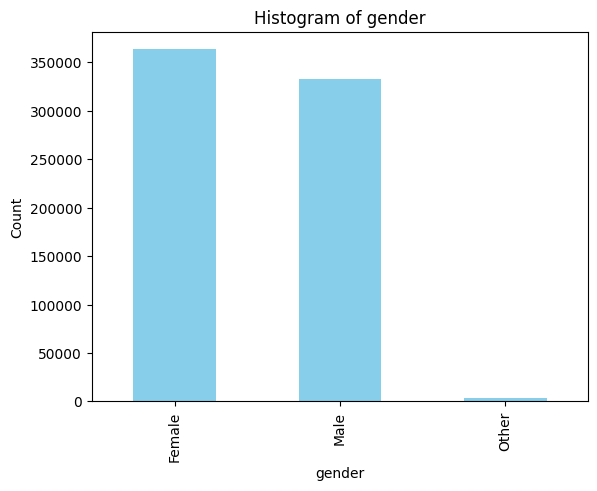

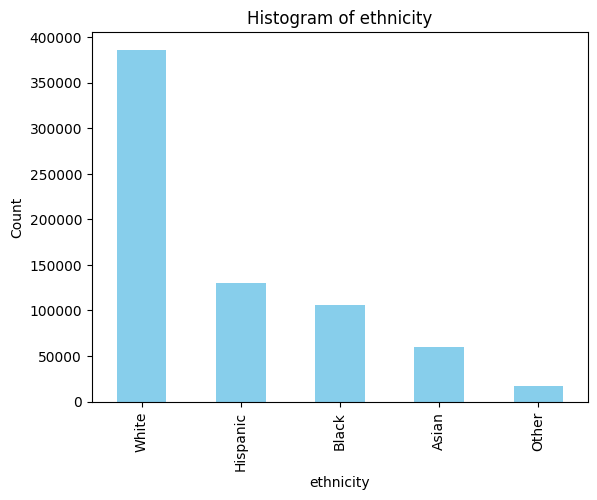

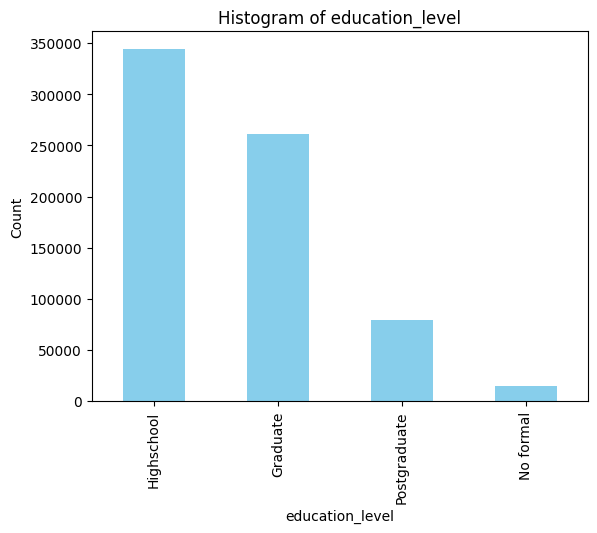

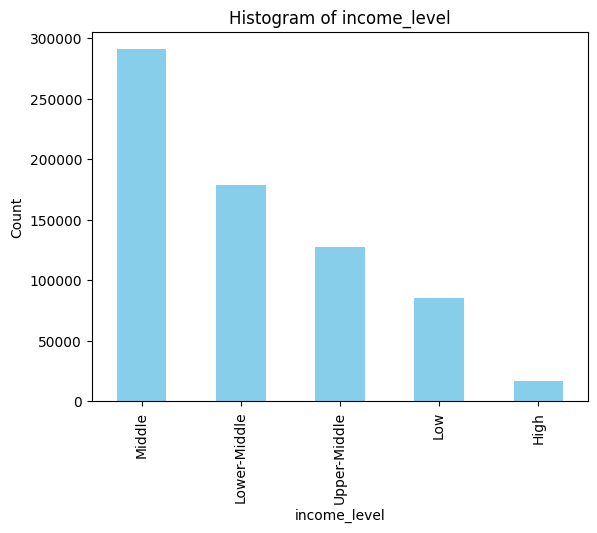

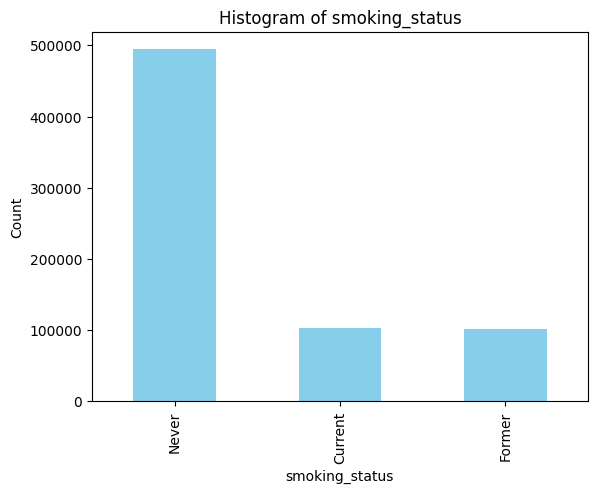

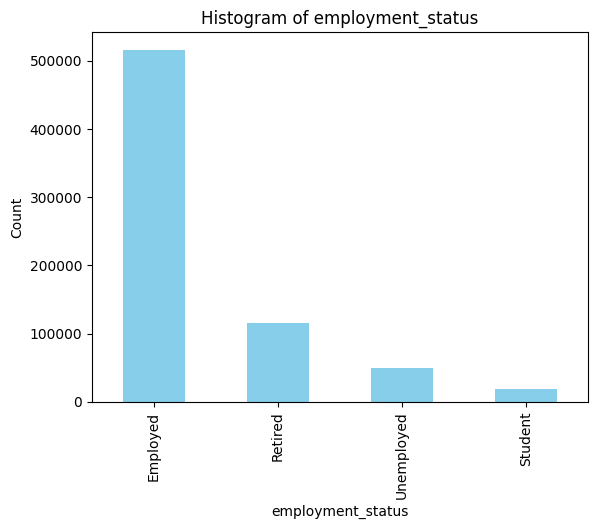

In [22]:
for col in categorical_data.columns:
    counts=categorical_data[col].value_counts()
    counts.plot(kind='bar',color='skyblue')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

### --------------------------------EDA ends here---------------------------------

### Extracting feature and target matrix from entire dataset

In [ ]:
X=train.iloc[:,1:25]   # feature matrix
y=train['diagnosed_diabetes']     # target matrix

### Data preprocessing and Model building

In [61]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
import optuna

In [33]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


In [34]:
# 1st encode the categorical features
# feature selection using SelectKBest
# define models
# use optuna for hpt

### Encoidng categorical data

In [115]:
from copy import deepcopy

In [116]:
X_copy=deepcopy(X)
y_copy=deepcopy(y)

In [117]:
cat_ord=['education_level', 'income_level']  # should be ordinal encoded
cat_ohe=['gender','ethnicity','smoking_status','employment_status'] # should be OneHot encoded

for col in cat_ord:
    X_copy[col]=OrdinalEncoder().fit_transform(np.array(X_copy[col]).reshape(-1,1))

"""
ordinal_encoding=Pipeline(
    steps=[
        ("ordinal_encode",OrdinalEncoder())
    ]
)
ohe_encoding=Pipeline(steps=[
    ("ohe_encode",OneHotEncoder(sparse_output=False))
])


encode=ColumnTransformer(
    transformers=[
        ("ordinal_encoding",ordinal_encoding,cat_ord),
        ("ohe_encoding",ohe_encoding,cat_ohe)
    ],
    remainder="passthrough"
)
"""

'\nordinal_encoding=Pipeline(\n    steps=[\n        ("ordinal_encode",OrdinalEncoder())\n    ]\n)\nohe_encoding=Pipeline(steps=[\n    ("ohe_encode",OneHotEncoder(sparse_output=False))\n])\n\n\nencode=ColumnTransformer(\n    transformers=[\n        ("ordinal_encoding",ordinal_encoding,cat_ord),\n        ("ohe_encoding",ohe_encoding,cat_ohe)\n    ],\n    remainder="passthrough"\n)\n'

In [118]:
# One hot encoding the other categorical features

X_copy=pd.get_dummies(X_copy,columns=cat_ohe).astype(int)

In [119]:
X_copy.shape

(700000, 35)

In [ ]:
X_copy.isna().sum().sum()  # sanity checking for any missing value

np.int64(0)

In [170]:
X_copy.select_dtypes(include=['object']).shape[1]   # all the features are numerical now

0

### calculating the number of outliers in each features

In [178]:
cols=X_copy.columns
for col in cols:
    s=0
    q1=np.quantile(X_copy[col],0.25)
    q3=np.quantile(X_copy[col],0.75)
    IQR=q3-q1
    for elem in X_copy[col]:
        if (elem > (q3+1.5*IQR)) or (elem<(q1-1.5*IQR)):
            s+=1
    print(f"Total outliers in {col} is ----->  {(s/X_copy[col].shape[0])*100:.2f}%")

Total outliers in age is ----->  0.14%
Total outliers in alcohol_consumption_per_week is ----->  0.07%
Total outliers in physical_activity_minutes_per_week is ----->  4.78%
Total outliers in diet_score is ----->  0.29%
Total outliers in sleep_hours_per_day is ----->  2.69%
Total outliers in screen_time_hours_per_day is ----->  0.21%
Total outliers in bmi is ----->  0.33%
Total outliers in waist_to_hip_ratio is ----->  0.01%
Total outliers in systolic_bp is ----->  0.11%
Total outliers in diastolic_bp is ----->  0.82%
Total outliers in heart_rate is ----->  0.26%
Total outliers in cholesterol_total is ----->  0.25%
Total outliers in hdl_cholesterol is ----->  0.67%
Total outliers in ldl_cholesterol is ----->  0.33%
Total outliers in triglycerides is ----->  1.29%
Total outliers in education_level is ----->  11.38%
Total outliers in income_level is ----->  2.46%
Total outliers in family_history_diabetes is ----->  14.94%
Total outliers in hypertension_history is ----->  18.20%
Total outl

In [182]:
X_copy['education_level'].unique()

array([1, 0, 3, 2])

In [184]:
X_copy['income_level'].unique()

array([2, 4, 1, 3, 0])

In [ ]:
# One hot and ordinal encoded features don't need to be checked for outliers.
# One hot encoded column has only 0 and 1, so no outliers.
# ordinal encoded columns 'education_level' and 'income_level'
# have integers 0 to 4. So, no outliers.

In [ ]:
# other features like 'hypertension_history','family_history_diabetes' have only 0 and 1. So, no outliers.

## Score the features using SelectKBest

In [149]:
selector=SelectKBest(score_func=f_classif,k='all')

In [150]:
selector.fit_transform(X_copy,y_copy)

array([[ 31,   1,  45, ...,   0,   0,   0],
       [ 50,   2,  73, ...,   0,   0,   0],
       [ 32,   3, 158, ...,   1,   0,   0],
       ...,
       [ 35,   1,  50, ...,   0,   0,   0],
       [ 49,   2,  70, ...,   1,   0,   0],
       [ 42,   4,  56, ...,   0,   0,   0]], shape=(700000, 35))

In [147]:
feature_score=pd.DataFrame({
    'features':X_copy.columns,
    'score':selector.scores_
}).sort_values('score',ascending=False)

In [148]:
feature_score

,features,score
17,family_history_diabetes,32637.503329
2,physical_activity_minutes_per_week,20778.692681
0,age,18666.103573
8,systolic_bp,8127.302645
6,bmi,7783.886841
13,ldl_cholesterol,7472.257953
14,triglycerides,5797.967616
11,cholesterol_total,5477.144225
12,hdl_cholesterol,1989.094306
3,diet_score,1844.747093


In [ ]:
X_copy_new=X_copy.loc[:,feature_score['features'][:10]]   # taking the 1st 10 highest scored features

In [153]:
X_copy_new

,family_history_diabetes,physical_activity_minutes_per_week,age,systolic_bp,bmi,ldl_cholesterol,triglycerides,cholesterol_total,hdl_cholesterol,diet_score
0,0,45,31,112,33,114,102,199,58,7
1,0,73,50,120,23,121,124,199,50,5
2,0,158,32,95,24,114,108,188,59,8
3,0,77,54,121,26,85,123,182,54,4
4,0,55,54,108,28,131,124,206,49,5
...,...,...,...,...,...,...,...,...,...,...
699995,0,59,29,133,26,90,126,163,58,6
699996,0,72,46,106,25,107,119,188,45,7
699997,0,50,35,127,26,77,166,168,59,5
699998,0,70,49,116,25,108,133,198,55,5


In [197]:
X_copy_new.isna().sum().sum()

np.int64(0)

### Model 1: LightGBM

In [202]:
# total number of data points in each class

y_copy.value_counts()

diagnosed_diabetes
1.0    436307
0.0    263693
Name: count, dtype: int64

In [ ]:
# above result shows the dataset is imbalanced, since class 1 dominates class 0 

In [198]:
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score,precision_score,recall_score,roc_auc_score

In [200]:
from sklearn.model_selection import KFold

In [ ]:
def objective1(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'n_jobs': -1,
        'objective': 'binary',
        'verbosity':-1
    }

    model = LGBMClassifier(**params)

    # 5 fold CV
    cv = KFold(n_splits=5)
    roc_auc = []

    for train_idx, val_idx in cv.split(X_copy_new):
        X_trainn, X_val = X_copy_new.iloc[train_idx], X_copy_new.iloc[val_idx]
        y_trainn, y_val = y_copy.iloc[train_idx], y_copy.iloc[val_idx]

        model.fit(
                X_trainn, y_trainn,
                eval_set=(X_val, y_val),
                eval_metric='auc'
            )

        y_pred = model.predict(X_val)
        roc_auc.append(roc_auc_score(y_val, y_pred))

    return np.mean(roc_auc)


In [213]:
optuna.logging.set_verbosity(optuna.logging.ERROR)

In [214]:
study1 = optuna.create_study(direction='maximize',study_name='lightgbm study')
study1.optimize(objective1, n_trials=30, show_progress_bar=True)

Best trial: 24. Best value: 0.634677: 100%|██████████| 30/30 [39:55<00:00, 79.86s/it]


In [215]:
print("Best R2 Score:", study1.best_value)
print("Best Parameters:")
for key, value in study1.best_params.items():
   print(f"  {key}: {value}")

Best R2 Score: 0.634677184451528
Best Parameters:
  n_estimators: 810
  learning_rate: 0.11125359845853353
  max_depth: 9
  min_child_samples: 92
  subsample: 0.7843414017041384
  colsample_bytree: 0.6845128652595124
  reg_alpha: 0.7415846306402588
  reg_lambda: 0.38295892252515545


In [216]:
best_params=study1.best_params
best_params['verbose']=-1
best_params['n_jobs']=-1
best_params['objective']='binary'
model1 = LGBMClassifier(
        **best_params
    )

In [218]:
# 5 fold cross validation on entire data

cv = KFold(n_splits=5)

fold=1
for train_idx, val_idx in cv.split(X_copy_new):
    X_trainn, X_val = X_copy_new.iloc[train_idx], X_copy_new.iloc[val_idx]
    y_trainn, y_val = y_copy.iloc[train_idx], y_copy.iloc[val_idx]

    model1.fit(
                X_trainn, y_trainn,
                eval_set=(X_val, y_val),
                eval_metric='auc'
            )

    y_pred = model1.predict(X_val)
    print(f"roc_auc score on fold {fold} is {roc_auc_score(y_val, y_pred)}")
    fold+=1

roc_auc score on fold 1 is 0.6360286346350001
roc_auc score on fold 2 is 0.6345893677280245
roc_auc score on fold 3 is 0.6349119059396688
roc_auc score on fold 4 is 0.6340325236381736
roc_auc score on fold 5 is 0.6338234903167731


In [219]:
# training the model on the entire data

model1.fit(X_copy_new,y_copy)

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,9
,learning_rate,0.11125359845853353
,n_estimators,810
,subsample_for_bin,200000
,objective,'binary'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,92


### Prediction part

In [266]:
# list of final features

f=list(X_copy_new.columns)

In [267]:
final_test=test[f]   # taking the necessary features from test dataframe

In [277]:
prediction=pd.DataFrame(model1.predict_proba(final_test))

In [278]:
prediction

,0,1
0,0.551394,0.448606
1,0.317303,0.682697
2,0.261763,0.738237
3,0.613966,0.386034
4,0.055864,0.944136
...,...,...
299995,0.305796,0.694204
299996,0.326031,0.673969
299997,0.567250,0.432750
299998,0.327521,0.672479


In [279]:
pred_df=pd.DataFrame({
    'id':test['id'],
    'diagnosed_diabetes':round(prediction[1],2)
})

In [281]:
pred_df.head()

,id,diagnosed_diabetes
0,700000,0.45
1,700001,0.68
2,700002,0.74
3,700003,0.39
4,700004,0.94


In [282]:
pred_df.to_csv('submission.csv',index=False)